Проект UNICEF — международного подразделения ООН
Миссия - повышение уровня благополучия детей по всему миру.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость
по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.
Для этого нужно создать модель, которая предсказывала бы результаты госэкзамена по математике
для каждого ученика школы.
Чтобы определиться с параметрами будущей модели, необходимо провести разведывательный анализ данных
и составить отчёт по его результатам

Описание датасета (переменные, которые содержит датасет):

1 school — аббревиатура школы, в которой учится ученик
2 sex — пол ученика ('F' - женский, 'M' - мужской)
3 age — возраст ученика (от 15 до 22)
4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15 failures — количество внеучебных неудач (n, если 1<=n<3, иначе 4)
16 schoolsup — дополнительная образовательная поддержка (yes или no)
17 famsup — семейная образовательная поддержка (yes или no)
18 paid — дополнительные платные занятия по математике (yes или no)
19 activities — дополнительные внеучебные занятия (yes или no)
20 nursery — посещал детский сад (yes или no)
21 higher — хочет получить высшее образование (yes или no)
22 internet — наличие интернета дома (yes или no)
23 romantic — в романтических отношениях (yes или no)
24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28 absences — количество пропущенных занятий
29 score — баллы по госэкзамену по математике

Дорожная карта проекта:

Первичный осмотр данных датасет
Первичный анализ данных в столбцах
Преобразовать данные (по необходимости).
Рассмотреть распределение признака для числовых переменных, устранить выбросы.
Оценить количество уникальных значений для номинативных переменных
Провести корреляционный анализ количественных переменных.
Отобрать не коррелирующие переменные.
Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину 'score'
Cформулировать выводы относительно качества данных и тех переменных, которые будут использованы в построении модели.

Необходимые для работы библиотеки

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
from itertools import combinations
from scipy.stats import ttest_ind
import math

In [3]:
from jupyterthemes import jtplot
jtplot.style(theme='chesterish', context='notebook', fscale=1.7, ticks=True,
             figsize=(8, 6.5))

In [4]:
# Загрузка датасета
# data study в дальнейшем 'ds'
ds = pd.read_csv('stud_math.csv')

In [5]:
# увеличим количество вывода строк и колонок
# показывать больше строк
pd.set_option('display.max_rows', 100)
# показывать больше колонок
pd.set_option('display.max_columns', 35)
# sns.set(style="darkgrid")
sns.set(style="whitegrid")

In [99]:
# проверим успешно ли импортируются данные и сделаем краткие выводы
display(ds.head(3))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,1,NaN,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,NaN,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,1,1,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,1,0,0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,NaN,0,1,-6.0,1,1,NaN,4.0,3.0,2.0,3.0,10.0,50.0


In [7]:
# все столбцы считались корректно
# проверим все ли столбцы из описания датасета загрузились
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

Первичный осмотр данных, краткие выводы:
всего 395 записей
загрузилось 30 столбцов (в описании 29)
числовых - три: age, absences, score
бинарных -  тринадцать (по два значения каждый): school, sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic
оценочных - тринадцать (по несколько значений): Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health
прочие - один: studytime, granular (отсутствует в описании к датасету, имеет отрицательные значения)

In [8]:
# посмотрим наименования колонок
ds.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [9]:
# переименуем, для удобства, колонки начинающиеся с большой буквы на маленькую
# и сложные названия в простые (studytime, granular)
ds.rename(columns={'Pstatus': 'pstatus', 'Medu': 'medu', 'Fedu': 'fedu',
                   'Mjob': 'mjob', 'Fjob': 'fjob', 'studytime, granular': 'studytime_g'}, inplace=True)

In [100]:
# выведим и проверим названия колонок
display(ds.head(3))

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_g,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18.0,1,NaN,1,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,1,0,0,0,1,-6.0,1,NaN,0,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17.0,1,1,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,0,1,0,0,0,-6.0,1,1,0,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15.0,1,0,0,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,1,0,NaN,0,1,-6.0,1,1,NaN,4.0,3.0,2.0,3.0,10.0,50.0


Рассмотрим все колонки датасета по отдельности

school — школы, в которых учатся ученики

In [11]:
# проверим сколько и каких значений содержит колонка
pd.DataFrame(ds.school.value_counts())

,school
GP,349
MS,46


In [12]:
ds.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
school    395 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


все данные заполнены, есть два названия школ,которые соответствуют описанию в датасет
учащихся в школе GP в 7,5 раз больше чем MS

age — возраст учеников (от 15 до 22)

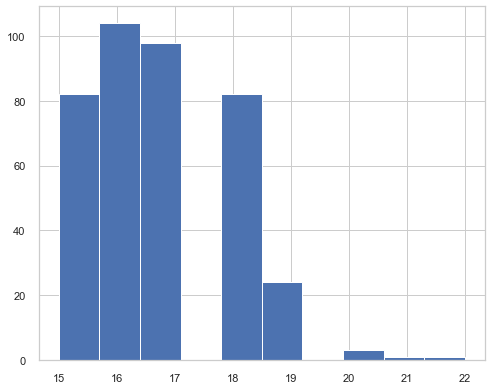

In [13]:
ds.age.hist()

In [14]:
# кажется что пропущены какие-то значения между 17-18 и 19-20
# убедимся что пропусков нет
ds.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

пропуски отсутствуют

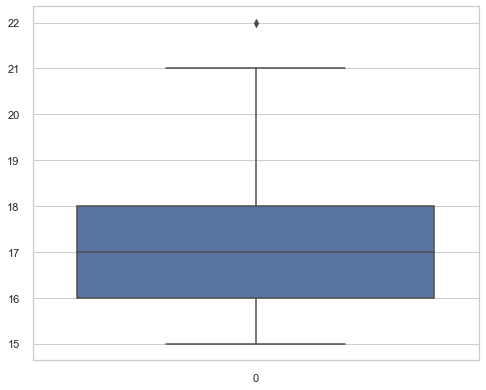

In [15]:
# построим box-plot чтобы проверить на наличие выбросов
sns.boxplot(data=ds.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


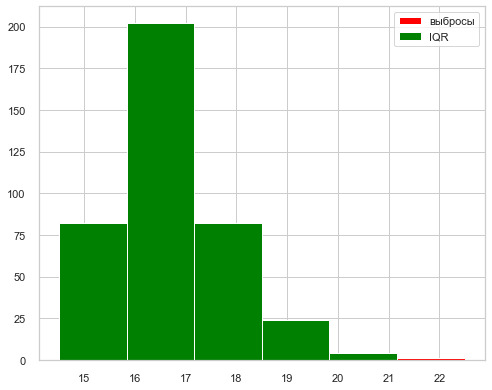

In [16]:
# boxp-lot предлагает выкинуть выброс возраста 22
# проведем анализ границ и расчитаем их значения, чтобы определить границу возможного выброса
median = ds.age.median()
IQR = ds.age.quantile(0.75) - ds.age.quantile(0.25)
perc25 = ds.age.quantile(0.25)
perc75 = ds.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


ds.age.loc[ds.age <= 22].hist(bins=6,
                              range=(14.5, 22.5),
                              color='red',
                              label='выбросы')

ds.age.loc[ds.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=6,
                                                                    range=(
                                                                        14.5, 22.5),
                                                                    color='green',
                                                                    label='IQR')

plt.legend()

граница выброса действительно на 21

In [17]:
# удаляем значение 22
ds.loc[ds['age'] == 22.0, 'age'] = np.nan

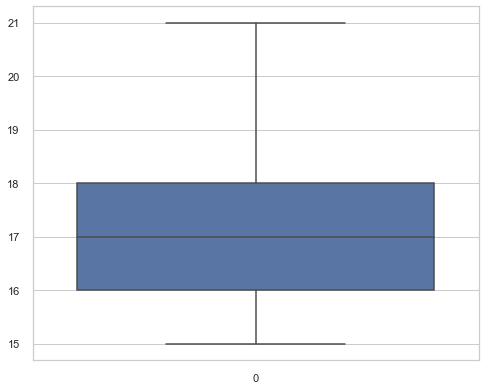

In [18]:
# построим box-plot чтобы убедится что выбросов нет
sns.boxplot(data=ds.age)

распределение признака асимметричное (имеет длинный хвост справа) 
выбросов нет (значение 22 удалено)
большинство учеников в возрасте 16-17 лет

In [19]:
# посмотрим какая связь между возрастом и успеваимостью
display(pd.DataFrame(ds.groupby(['age']).score.agg(
    ['count', 'mean', 'max', 'min', 'median'])))

,count,mean,max,min,median
age,,,,,
15.0,82,56.280488,95.0,0.0,55.0
16.0,103,55.194175,100.0,0.0,55.0
17.0,98,51.377551,90.0,0.0,55.0
18.0,80,48.312500,95.0,0.0,50.0
19.0,21,40.238095,65.0,0.0,45.0
20.0,3,70.000000,90.0,45.0,75.0
21.0,1,35.000000,35.0,35.0,35.0


можно сделать вывод, что чем старше учащийся тем ниже успеваемость, но нужно проверить корреляцию

medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [20]:
pd.DataFrame(ds.medu.value_counts())

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


In [21]:
ds.loc[:, ['medu']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
medu    392 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит пять уникальных значений согласно описанию датасет 
три строки в которых есть пропуски, но заполнить пропуски пока не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем, так как их влияние минимально

fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [22]:
pd.DataFrame(ds.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


есть одно значение которое отсутствует в описании датасета 40.0
похоже на ошибку при внесении информации

In [23]:
# заменим его на правильное значение 4.0
ds.loc[ds['fedu'] == 40.0, 'fedu'] = 4.0

In [24]:
# проверим
pd.DataFrame(ds.fedu.value_counts())

,fedu
2.0,106
3.0,96
4.0,89
1.0,78
0.0,2


содержит пять уникальных значений как в описании датасет 
24 строки в которых есть пропуски, с

mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [25]:
pd.DataFrame(ds.mjob.value_counts())

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


In [26]:
ds.loc[:, ['mjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
mjob    376 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


содержит пять уникальных значений как в описании датасет 
19 строк в которых есть пропуски, но заполнить пропуски пока не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем, так как их влияние минимально

fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [27]:
pd.DataFrame(ds.fjob.value_counts())

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


In [28]:
ds.loc[:, ['fjob']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
fjob    359 non-null object
dtypes: object(1)
memory usage: 3.2+ KB



содержит пять уникальных значений как в описании датасет
36 строк в которых пропуски 
можно заполнить наиболее часто встречающимися значениями (mode), заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
лучше провести анализ до конца и потом, если будет необходимость вернутся к этому столбцу чтобы заполнить пропуски
удалять пропуски пока не будем

reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [29]:
pd.DataFrame(ds.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,34


In [30]:
ds.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
reason    378 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


содержит четыре уникальных значения как в описании датасет 
17 строк в которых пропуски, но но заполнить пропуски пока не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем

guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [31]:
pd.DataFrame(ds.guardian.value_counts())

,guardian
mother,250
father,86
other,28


In [32]:
ds.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
guardian    364 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


содержит три уникальных значения как в описании датасет
31 строка в которых есть пропуски 
можно заполнить наиболее часто встречающимися значениями (mode), заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
лучше провести анализ до конца и потом, если будет необходимость вернутся к этому столбцу чтобы заполнить пропуски
удалять пропуски пока не будем

traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [33]:
pd.DataFrame(ds.traveltime.value_counts())

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


In [34]:
ds.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
traveltime    367 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит четыре уникальных значения как в описании датасет 
28 строк в которых есть пропуски 
можно заполнить наиболее часто встречающимися значениями (mode), заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
лучше провести анализ до конца и потом, если будет необходимость вернутся к этому столбцу чтобы заполнить пропуски
удалять пропуски пока не будем

studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов) + studytime_g

In [35]:
# посмотрим на значения этих колонок
ds.loc[:, ['studytime', 'studytime_g']]

,studytime,studytime_g
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


прослеживается взаимосвязь между значениями этих колонок 

In [36]:
# посмотрим распределение значений этих столбцов
display(pd.DataFrame(ds.studytime.value_counts()),
        pd.DataFrame(ds.studytime_g.value_counts()))

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


,studytime_g
-6.0,194
-3.0,103
-9.0,64
-12.0,27


In [37]:
# проверим корреляцию двух столбцов
ds['studytime'].corr(ds['studytime_g'])

-1.0

присутствует 100% обратная корреляция между значениями studytime и studytime_g

In [38]:
# проведем дальнейший анализ studytime (studytime_g пока не будем, так как его нет в описательной части датасета)
ds.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
studytime    388 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


studytime - содержит четыре уникальных значения 
7 строк в которых есть пропуски, но заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
лучше провести анализ до конца и потом, если будет необходимость вернутся к этому столбцу чтобы заполнить пропуски
удалять пропуски пока не будем
studytime_g - на 100% обратно скоррелирован со studytime и его можно удалить, но пока не будем его удалять

failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

In [39]:
pd.DataFrame(ds.failures.value_counts())

,failures
0.0,293
1.0,49
2.0,16
3.0,15


содержит четыре уникальных значения, но не соответствуют значениям указанным в датасете (n, если 1<=n<3, иначе 4)
видимо в описании закралась ошибка, оставляем так как есть (без значения 4)

In [40]:
ds.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
failures    373 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


22 строки в которых есть пропуски, можно заменить пропуски, но самое часто встречающееся значение 0
удалять пропуски пока не будем

famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [41]:
pd.DataFrame(ds.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


одно значение отсутствует в описании датасет -1.0
скорее всего это ошибка при внесении информации

In [42]:
# заменим его на 1.0
ds.loc[ds['famrel'] == -1.0, 'famrel'] = 1.0

In [43]:
# проверим
pd.DataFrame(ds.famrel.value_counts())

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,8


In [44]:
ds.loc[:, ['famrel']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
famrel    368 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит пять уникальных значений как в описании датасет 
27 строк в которых сеть пропуски, заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем

freetime - свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [45]:
pd.DataFrame(ds.freetime.value_counts())

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


In [46]:
ds.loc[:, ['freetime']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
freetime    384 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит пять уникальных значения как в описании датасет
11 строк в которых есть пропуски, но заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем

goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [47]:
pd.DataFrame(ds.goout.value_counts())

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


In [48]:
ds.loc[:, ['goout']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
goout    387 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит пять уникальных значения как в описании датасет 
8 строк в которых есть пропуски, но заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем

health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [49]:
pd.DataFrame(ds.health.value_counts())

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


In [50]:
ds.loc[:, ['health']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
health    380 non-null float64
dtypes: float64(1)
memory usage: 3.2 KB


содержит пять уникальных значения как в описании датасета 
15 строк в которых есть пропуски,  но заполнить пропуски на данный момент не представляется возможным, так как вариантов для заполнения слишком много
удалять пропуски пока не будем

absences — количество пропущенных занятий

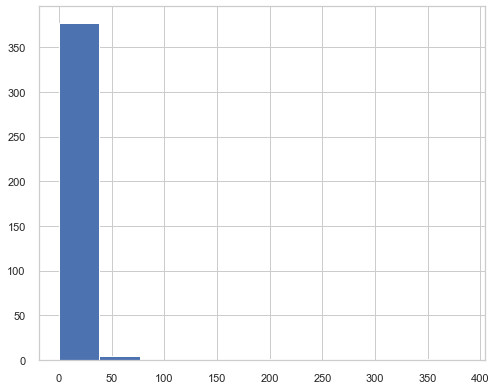

In [51]:
ds.absences.hist()

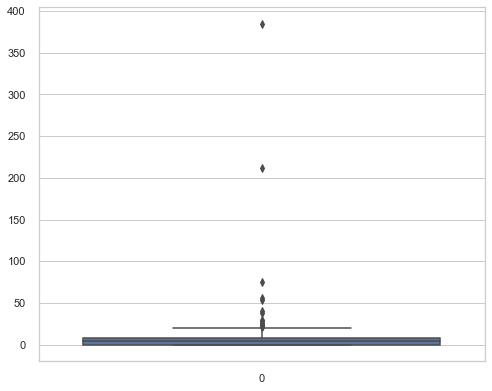

In [52]:
# построим box-plot чтобы проверить на наличие выбросов
sns.boxplot(data=ds.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


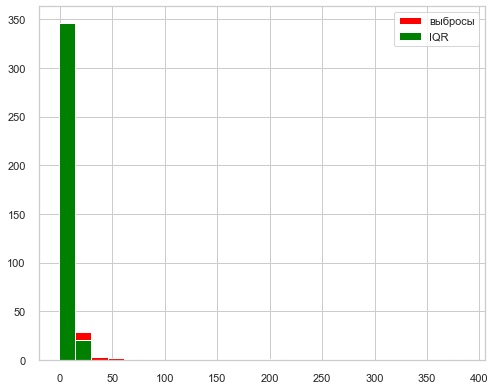

In [53]:
# проведем анализ границ и расчитаем их значения, чтобы определить границу возможного выброса
median = ds.absences.median()
IQR = ds.absences.quantile(0.75) - ds.absences.quantile(0.25)
perc25 = ds.absences.quantile(0.25)
perc75 = ds.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


ds.absences.loc[ds.absences <= 385].hist(bins=25,
                                         range=(-1, 386),
                                         color='red',
                                         label='выбросы')

ds.absences.loc[ds.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=25,
                                                                              range=(-1,
                                                                                     386),
                                                                              color='green',
                                                                              label='IQR')

plt.legend()

очень похоже на ассимитричное распределение
проверим это, добавим к распределению небольшую погрешность смещения

In [54]:
f = 0.001
absences_n = ds.absences.apply(lambda x: math.log(x+f))

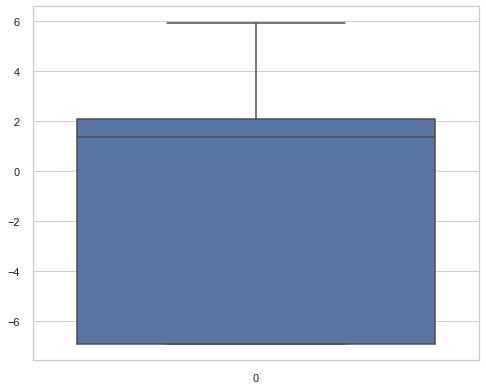

In [55]:
# построим box-plot чтобы проверить на наличие выбросов
sns.boxplot(data=absences_n)

выбросов нет 
удалять ничего не будем

In [56]:
ds.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

распределение признака ассиметричное
выбросов нет
большинство пропусков находятся в пределах от 0 до 8

score — баллы по госэкзамену по математике

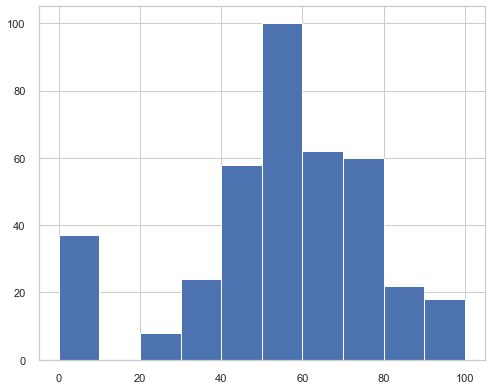

In [57]:
ds.score.hist()

на первый взгляд cлевапотенциальный выброс


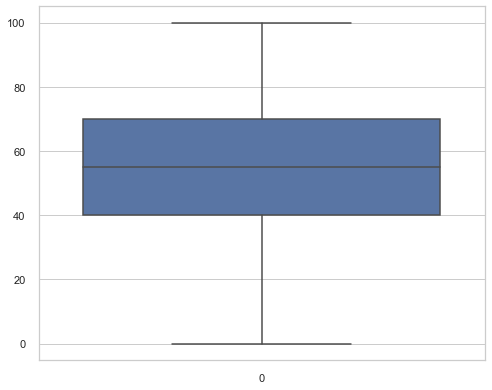

In [58]:
# построим box-plot чтобы проверить на наличие выбросов
sns.boxplot(data=ds.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 70.0,  Границы выбросов: [-65.0, 175.0].


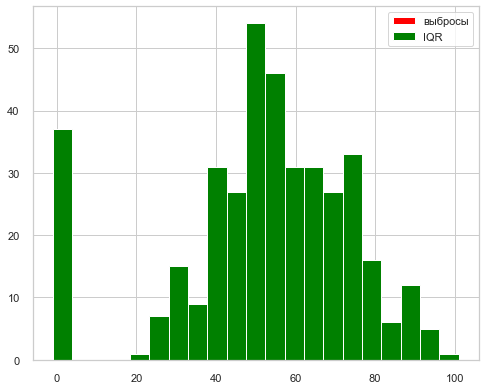

In [59]:
# сделаем анализ границ и расчитаем их точные значения на предмет возможных выбросов
median = ds.score.median()
IQR = ds.score.quantile(0.75) - ds.absences.quantile(0.25)
perc25 = ds.score.quantile(0.25)
perc75 = ds.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


ds.score.loc[ds.score <= 101].hist(bins=21,
                                   range=(-1, 101),
                                   color='red',
                                   label='выбросы')

ds.score.loc[ds.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=21,
                                                                        range=(-1,
                                                                               101),
                                                                        color='green',
                                                                        label='IQR')

plt.legend()

In [60]:
ds.score.value_counts()

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

много нулевых значений 37

In [61]:
# посмотрим на распределение без нулевых значений
score_n = ds.score.apply(lambda x: x if x > 0 else np.nan)

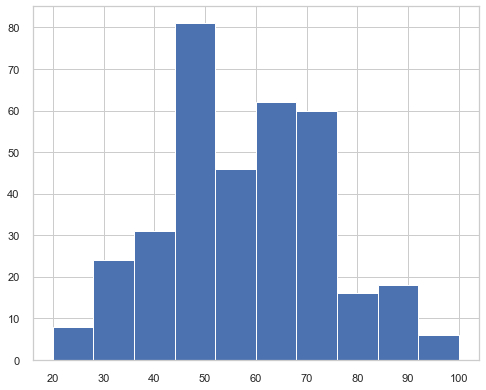

In [62]:
score_n.hist(bins=10)

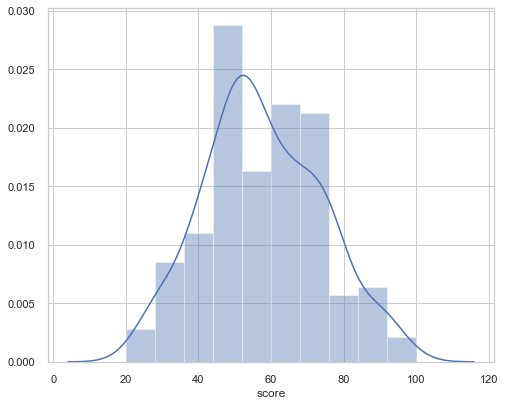

In [96]:
sns.distplot(score_n, bins=10)

25-й перцентиль: 45.0, 75-й перцентиль: 70.0, IQR: 25.0,  Границы выбросов: [7.5, 107.5].


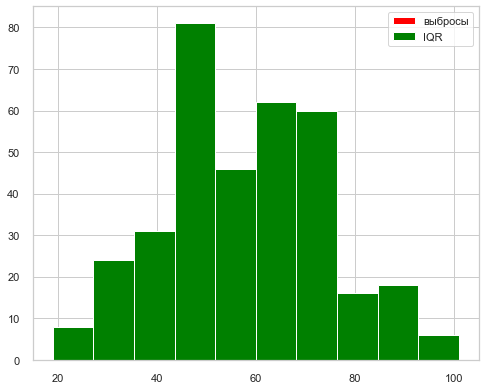

In [64]:
# сделаем анализ границ и расчитаем их точные значения
median = score_n.median()
IQR = score_n.quantile(0.75) - score_n.quantile(0.25)
perc25 = score_n.quantile(0.25)
perc75 = score_n.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


score_n.loc[score_n <= 101].hist(bins=10,
                                 range=(19, 101),
                                 color='red',
                                 label='выбросы')
score_n.loc[score_n.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=10,
                                                                      range=(
                                                                          19, 101),
                                                                      color='green',
                                                                      label='IQR')

plt.legend()

распределение без ноля демонстрирует, что дисперсия увеличена и распределение выглядит вытянутым в бока при такой ситуации оно может вбирать в себя выбросы которые будут возникать рядом
скорее всего при внесении данных возникли ошибки - нулевые значения, и данные значения присутствует в достаточно большом количестве 37 
так как у нас модель должна прогнозировать группу риска, то заменим нулевые значения на минимальное значение 10.0 (миниммальная оценка не попадающая в выбросы), таким образом мы расширяем потенциальную группу риска

In [65]:
# заменим нулевые значения на минимальное значение 10.0
ds.loc[ds['score'] == 0.0, 'score'] = 10.0

In [66]:
# проверим
ds.score.value_counts()

50.0     54
55.0     46
10.0     37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

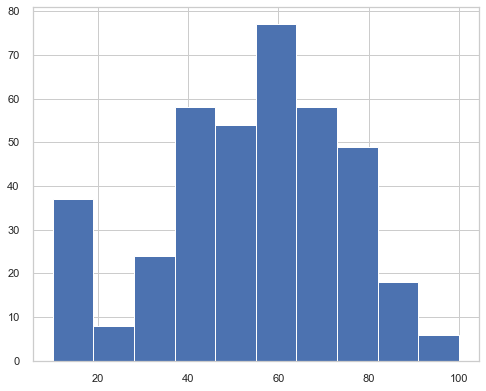

In [67]:
ds.score.hist(bins=10)

распределение значений нормальное с большой дисперсией
выбросов нет 
заменили значения 0.0 на минимально возможное 10.0, чтобы расширить потенциальную группу риска

проанализируем группу категориальных признаков

In [68]:
list_n = []
bin_columns = ['address', 'famsize', 'pstatus',
               'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']

In [69]:
for elem in bin_columns:
    a = ds[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        list_n.append([a[0], a[1]])
    else:
        print(
            f"со столбцом {elem} произошла ошибка. Уникальные значения: ds[elem].values")
list_n

[['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [70]:
list_n[5] = ['yes', 'no']
list_n

[['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

ошибок в написании возможных вариантов значений нет

In [71]:
# приведем yes и no к единообразию
list_n[4] = ['yes', 'no']
list_n[5] = ['yes', 'no']
list_n[6] = ['yes', 'no']
list_n[10] = ['yes', 'no']

In [72]:
# проверяем
list_n

[['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no']]

In [73]:
# заменяем
for i in range(len(bin_columns)):
    elem = bin_columns[i]
    ds.loc[ds[elem] == list_n[i][0], elem] = 1.0
    ds.loc[ds[elem] == list_n[i][1], elem] = 0.0

In [74]:
# проверяем
list_n = []
for elem in bin_columns:
    a = ds[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        list_n.append([a[0], a[1]])
    else:
        print(
            f"со столбцом {elem} произошла ошибка. Уникальные значения: ds[elem].values")
list_n

[[1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [0.0, 1.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [1.0, 0.0],
 [0.0, 1.0]]

In [75]:
# ошибок нет
# продолжаем анализ значений
ds[bin_columns].describe()

,address,famsize,pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,378.0,368.0,350.0,386.0,356.0,355.0,381.0,379.0,375.0,361.0,364.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
freq,295.0,261.0,314.0,335.0,219.0,200.0,195.0,300.0,356.0,305.0,240.0


In [76]:
temp = ds[bin_columns].describe()

In [77]:
# расчитаем кол-во пропущенных значений
395-temp.T['count']

address       17.0
famsize       27.0
pstatus       45.0
schoolsup      9.0
famsup        39.0
paid          40.0
activities    14.0
nursery       16.0
higher        20.0
internet      34.0
romantic      31.0
Name: count, dtype: float64

In [78]:
# для критериев с пропусками больше 10 выведем частоту встречаемости значений
ds.pivot_table(['address', 'famsize', 'pstatus', 'famsup', 'paid', 'activities',
                'nursery', 'higher', 'internet', 'romantic'], 'sex', aggfunc=['count'])

count                                                              \
    activities address famsize famsup higher internet nursery paid pstatus   
sex                                                                          
F          202     200     197    182    203      194     200  189     184   
M          179     178     171    174    172      167     179  166     166   

              
    romantic  
sex           
F        195  
M        169

критерии приведены к численным значениям и готовы к загрузкам в модель
много пропусков в критерии pstatus 45
заполнить пропуски для всех критериев на данный момент не представляется возможным, так как значения внутри распределены без очевидных перекосов

Корреляционный анализ

числовые переменные
выясним какие колонки лучше всего коррелируют со score
это поможет определить, какие параметры стоит оставить для модели, а какие — исключить

In [79]:
ds_num = ds[['age', 'absences', 'score']]

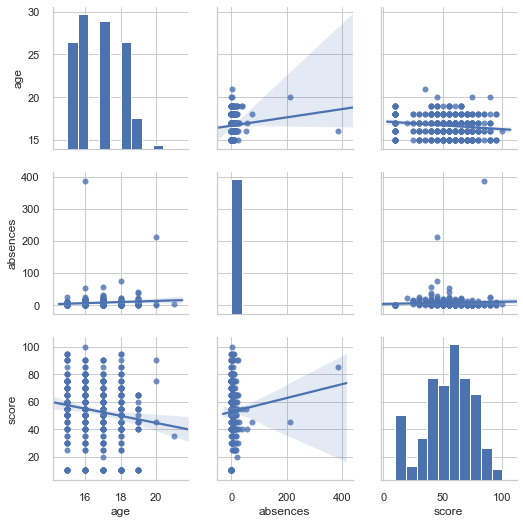

In [80]:
sns.pairplot(ds_num, kind='reg')

In [81]:
# матрица корреляций:
ds_num.corr()

,age,absences,score
age,1.000000,0.091656,-0.154271
absences,0.091656,1.000000,0.057566
score,-0.154271,0.057566,1.000000


оставляем эти два критерия потому что они не сколлерированны между собой
между возрастом есть обратная корреляция, чем выше возраст тем ниже значение score

категориальные переменные
посмотрим различаются ли распределения в зависимости от значения этих переменных

In [82]:
# для удобства составим списки этих значений
bin_columns.append('school')
rating_columns = ('medu', 'fedu', 'mjob', 'fjob',
                  'reason', 'guardian', 'traveltime', 'studytime',
                            'failures', 'famrel', 'freetime', 'goout', 'health')
all_columns = []
all_columns.extend(bin_columns)
all_columns.extend(rating_columns)

анализ категориальных переменных

In [83]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=ds.loc[ds.loc[:, column].isin(
                    ds.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

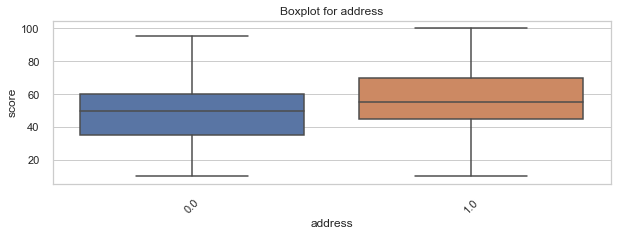

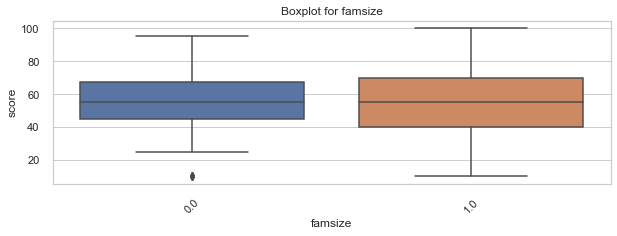

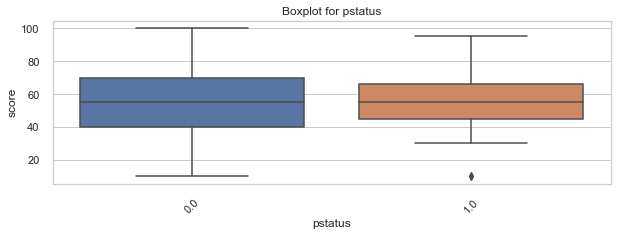

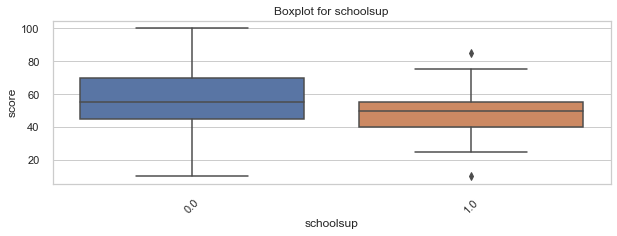

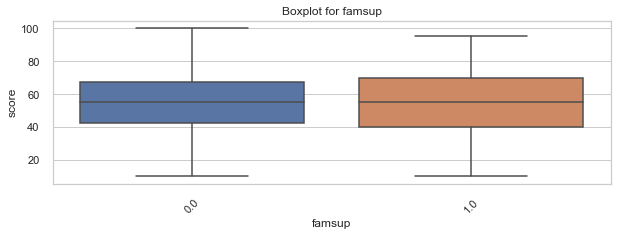

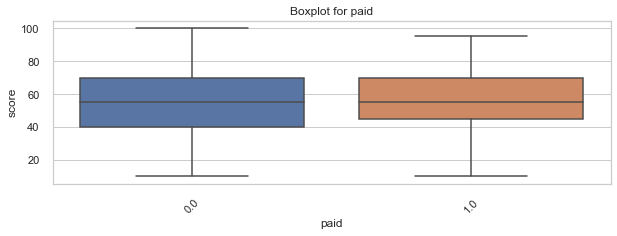

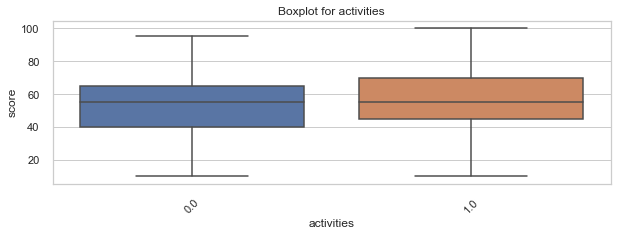

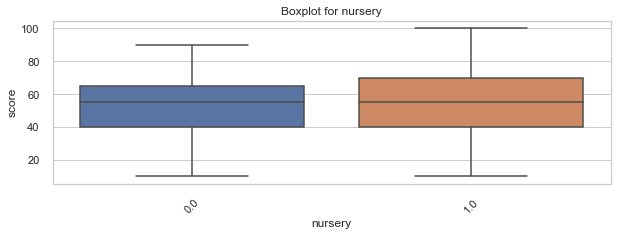

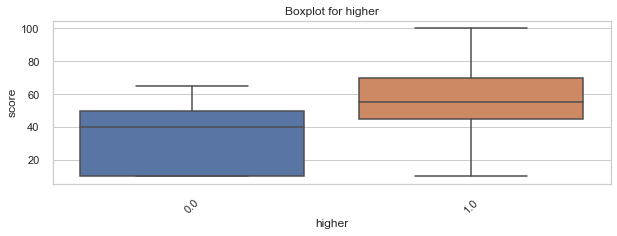

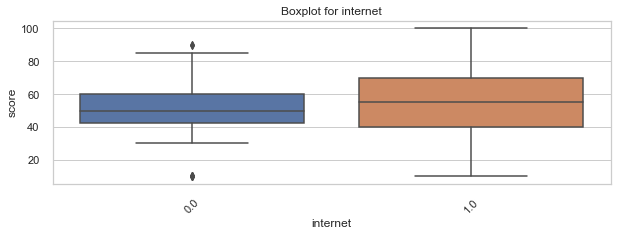

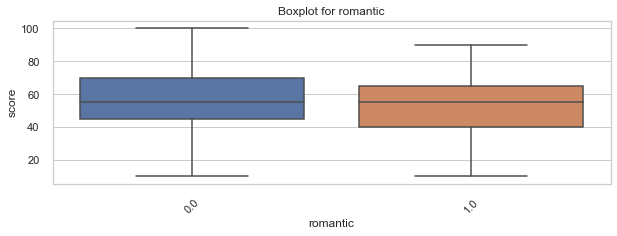

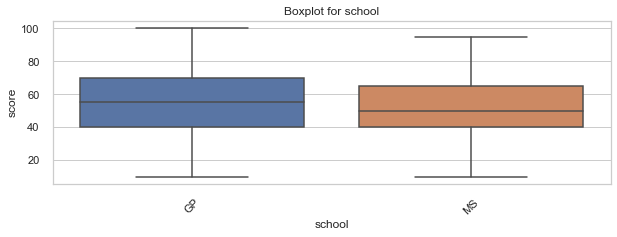

In [84]:
# box-plot категорийных
for col in bin_columns:
    get_boxplot(col)

кажется что плотности распределения различаются для следующих распределений:
schoolsup
nursery
higher 
нужно посмотреть, что покажет тест Стьюдента

анализ оценочных категориальных переменных

In [85]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=ds.loc[ds.loc[:, column].isin(
                    ds.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

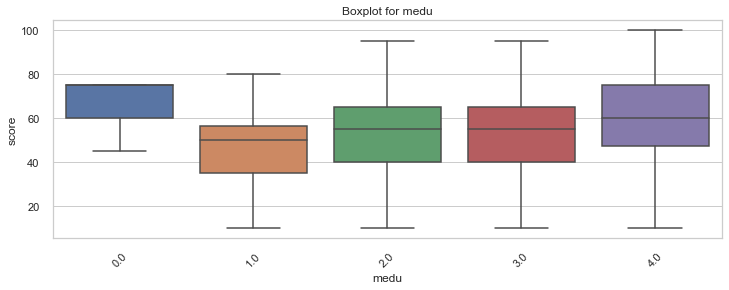

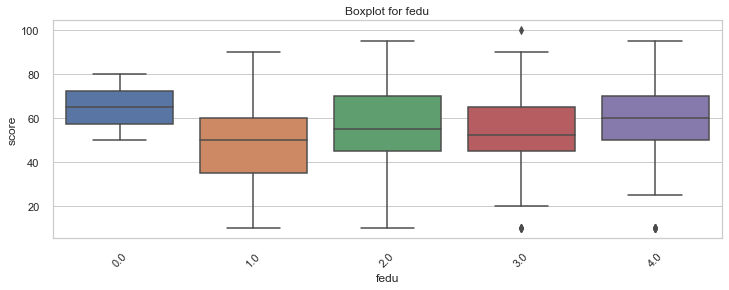

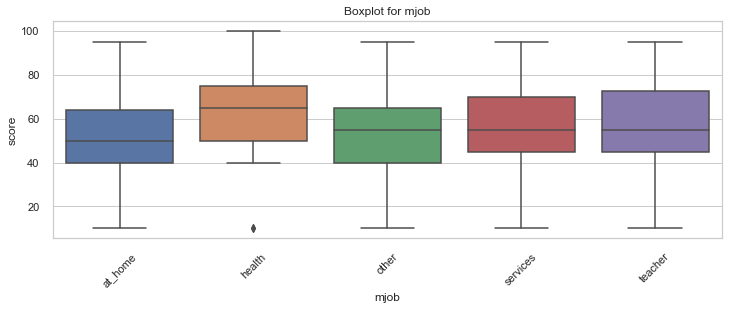

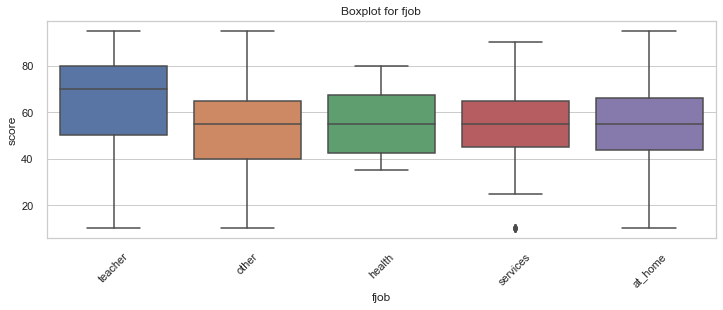

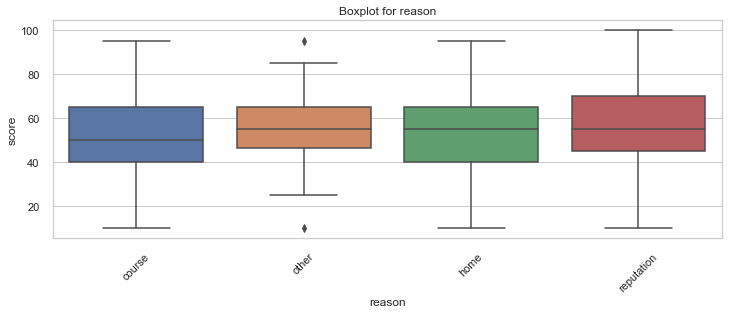

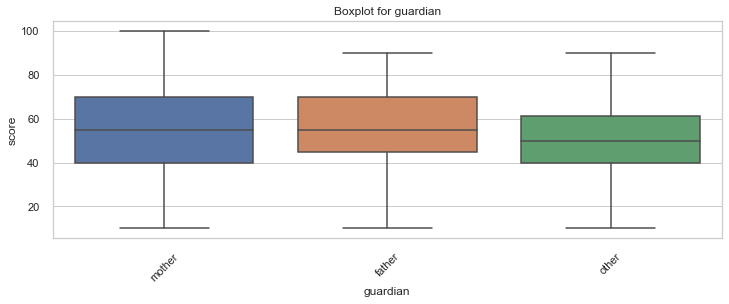

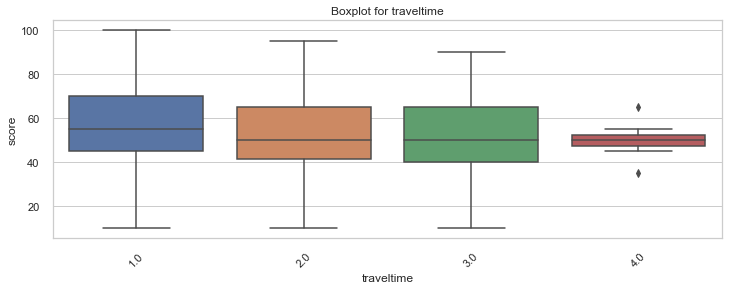

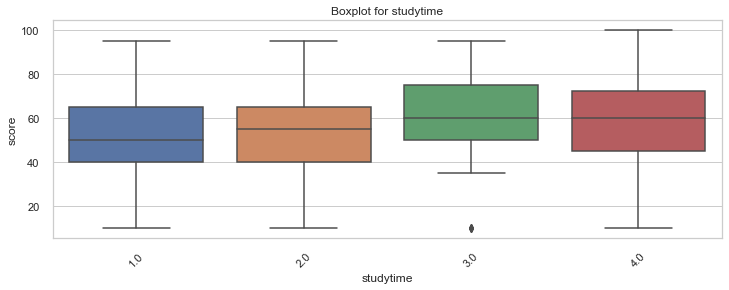

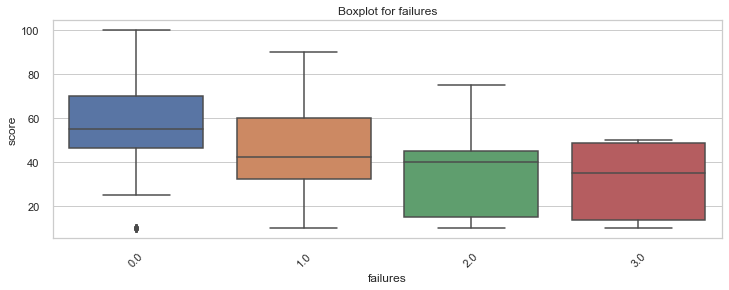

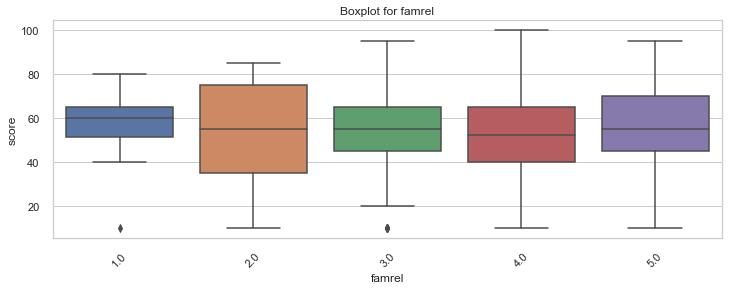

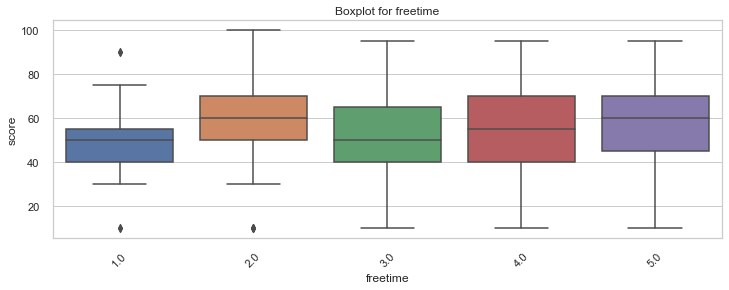

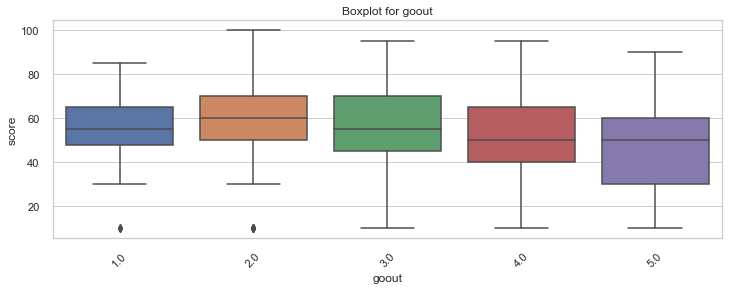

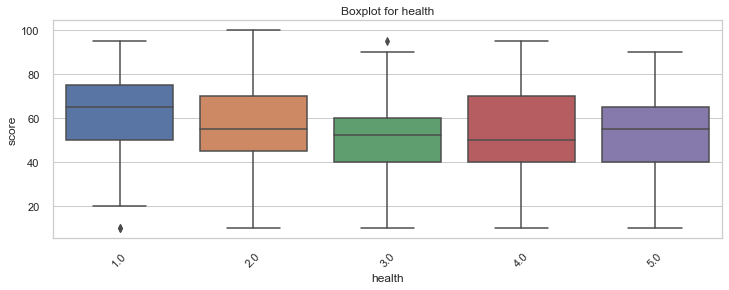

In [86]:
# box plot для оценочных
for col in rating_columns:
    get_boxplot(col)

кажется что плотности распределения существенно различаются для следующих распределений:
medu
fedu
mjob
fjob
studytime
failures
goout
health
посмотрим что покажет тест Стьюдента

тест Стьюдента по всем категориальным признакам
проверим, есть ли статистическая разница в распределении оценок по всем категориальным признакам 
проверим нулевую гипотезу о том,что распределения score по различным параметрам одинаковы

In [87]:
def get_stat_dif(column):
    cols = ds.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        ttest = ttest_ind(ds.loc[ds.loc[:, column] == comb[0], 'score'].dropna(),
                          ds.loc[ds.loc[:, column] == comb[1], 'score'].dropna()).pvalue
#         print(f"для столбца {column} ttest:= {ttest}")
#         print(f"                     comb:= {combinations_all}")
        if ttest <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [88]:
for elem in all_columns:
    get_stat_dif(elem)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


достаточно отличаются 8 параметров: address, schoolsup, higher, romantic, medu, mjob, failures, goout оставим эти переменные в датасете
всего получилось 10 переменных , которые возможно оказывают влияние на score: age, absences, address, schoolsup, higher, romantic, medu, mjob, failures, goout

In [89]:
ds_model = ds.loc[:, ['age', 'absences', 'address', 'schoolsup',
                      'higher', 'romantic', 'medu', 'mjob', 'failures', 'goout', 'score']]

In [90]:
# проверяем
ds_model.head(3)

,age,absences,address,schoolsup,higher,romantic,medu,mjob,failures,goout,score
0,18.0,6.0,1,1,1,0,4.0,at_home,0.0,4.0,30.0
1,17.0,4.0,1,0,1,0,1.0,at_home,0.0,3.0,30.0
2,15.0,10.0,1,1,1,NaN,1.0,at_home,3.0,2.0,50.0


In [91]:
# проверим нет ли дублей (сильно скоррелированных столбцов)
ds_model.corr()

,age,absences,medu,failures,goout,score
age,1.000000,0.091656,-0.167883,0.195891,0.119997,-0.154271
absences,0.091656,1.000000,-0.011944,0.057391,-0.048738,0.057566
medu,-0.167883,-0.011944,1.000000,-0.245463,0.064164,0.216634
failures,0.195891,0.057391,-0.245463,1.000000,0.120914,-0.345345
goout,0.119997,-0.048738,0.064164,0.120914,1.000000,-0.139646
score,-0.154271,0.057566,0.216634,-0.345345,-0.139646,1.000000


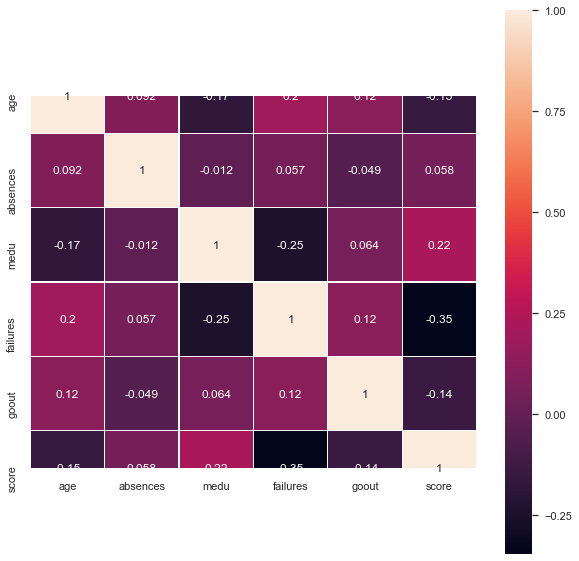

In [92]:
# построим тепловую карту
plt.subplots(figsize=(10, 10))
sns.heatmap(ds_model.corr(), square=True, annot=True, linewidths=0.1)

визуальный осмотр значений по этим столбцам показал, что значений очень близких к 1 или -1 нет, значит все хорошо

Выводы
в результате проведенного EDA данных датасета для модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы были получены следующие выводы:
в данных достаточно много пустых значений, только 3 столбца из 29 заполнены полностью
в некоторых процент пропусков доходит до 12%
выбросы: в колонке age значение 22 удалено
замены: в колонке score произведена замена значения 0.0 на минимально допустимое значение 10.0, чтобы расширить круг потенциальных учеников, которые могут попасть в группу риска
гипотезы:
чем больше возраст тем ниже может быть score
чем больше неудач по другим предметам тем ниже может быть score
чем больше ученик проводит времени с друзьями тем ниже может быть score
чем лучше образование родителей тем выше может быть score
отобраны 10 критериев, которые предлагается использовать для построения модели: age, absences, address, schoolsup, higher, romantic, medu, mjob, failures, goout

In [93]:
print(full)

NameError: name 'full' is not defined